Epoch 0, Loss: 0.178907
Epoch 500, Loss: 0.025683
Epoch 1000, Loss: 0.025683
Epoch 1500, Loss: 0.025683
Epoch 2000, Loss: 0.025682
Epoch 2500, Loss: 0.025685
Epoch 3000, Loss: 0.025680
Epoch 3500, Loss: 0.025689
Epoch 4000, Loss: 0.025680
Epoch 4500, Loss: 0.025679


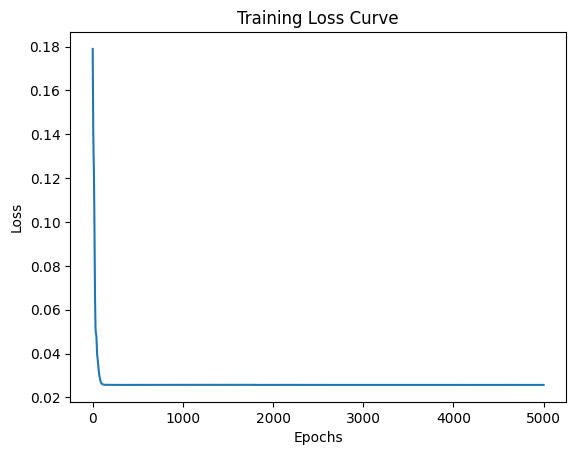

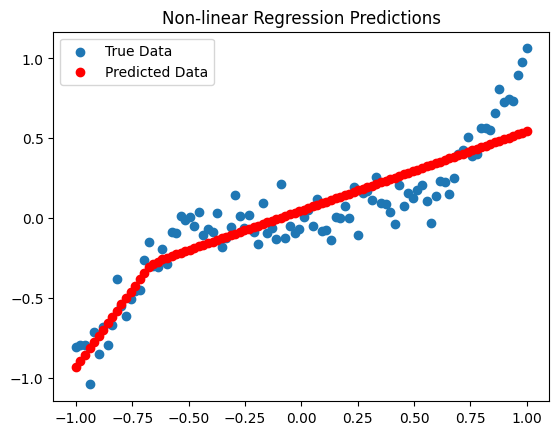

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

torch.manual_seed(42)
X = torch.linspace(-1, 1, 100).reshape(-1, 1)
y = X**3 + 0.1 * torch.randn(X.shape)


class ThreeLayerNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(ThreeLayerNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = ThreeLayerNN(input_size=1, hidden_size1=10, hidden_size2=10, output_size=1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


epochs = 5000
losses = []


for epoch in range(epochs):
    optimizer.zero_grad()


    preds = model(X)
    loss = criterion(preds, y)
    losses.append(loss.item())


    loss.backward()
    optimizer.step()


    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.6f}")


plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

with torch.no_grad():
    preds = model(X)
plt.scatter(X, y, label='True Data')
plt.scatter(X, preds, label='Predicted Data', color='red')
plt.legend()
plt.title('Non-linear Regression Predictions')
plt.show()